In [ ]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

In [3]:
# Lectura de datos
df_fraud <- read.csv('../input/PS_20174392719_1491204439457_log.csv')

# 1. Librerias

In [5]:
library(plyr)
library(tidyverse)
library(caret)
library(GGally)
library(stringr)
library(rattle)
library(pROC)
library(ROCR)

In [7]:
# Formato de cada columna
glimpse(df_fraud)

Observations: 6,362,620
Variables: 11
$ step           <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ type           <fct> PAYMENT, PAYMENT, TRANSFER, CASH_OUT, PAYMENT, PAYMENT…
$ amount         <dbl> 9839.64, 1864.28, 181.00, 181.00, 11668.14, 7817.71, 7…
$ nameOrig       <fct> C1231006815, C1666544295, C1305486145, C840083671, C20…
$ oldbalanceOrg  <dbl> 170136.0, 21249.0, 181.0, 181.0, 41554.0, 53860.0, 183…
$ newbalanceOrig <dbl> 160296.36, 19384.72, 0.00, 0.00, 29885.86, 46042.29, 1…
$ nameDest       <fct> M1979787155, M2044282225, C553264065, C38997010, M1230…
$ oldbalanceDest <dbl> 0, 0, 0, 21182, 0, 0, 0, 0, 0, 41898, 10845, 0, 0, 0, …
$ newbalanceDest <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, …
$ isFraud        <int> 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ isFlaggedFraud <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [8]:
#prefijo del clienye
fraud_df <- df_fraud %>%
    mutate(name_orig_first = str_sub(nameOrig,1,1)) %>%
    mutate(name_dest_first = str_sub(nameDest, 1, 1)) %>%
    select(-nameOrig, -nameDest)

In [15]:
glimpse(fraud_df)

Observations: 6,362,620
Variables: 11
$ step            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ type            <fct> PAYMENT, PAYMENT, TRANSFER, CASH_OUT, PAYMENT, PAYMEN…
$ amount          <dbl> 9839.64, 1864.28, 181.00, 181.00, 11668.14, 7817.71, …
$ oldbalanceOrg   <dbl> 170136.0, 21249.0, 181.0, 181.0, 41554.0, 53860.0, 18…
$ newbalanceOrig  <dbl> 160296.36, 19384.72, 0.00, 0.00, 29885.86, 46042.29, …
$ oldbalanceDest  <dbl> 0, 0, 0, 21182, 0, 0, 0, 0, 0, 41898, 10845, 0, 0, 0,…
$ newbalanceDest  <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,…
$ isFraud         <int> 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ isFlaggedFraud  <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ name_orig_first <chr> "C", "C", "C", "C", "C", "C", "C", "C", "C", "C", "C"…
$ name_dest_first <fct> M, M, C, C, M, M, M, M, M, C, C, M, M, M, M, C, M, M,…


In [16]:
fraud_df$name_dest_first <- as.factor(fraud_df$name_dest_first)
table(fraud_df$name_dest_first)


      C       M 
4211125 2151495 

In [27]:
fraud_df2 <- fraud_df %>%
    select(-name_orig_first, -isFlaggedFraud) %>%
    select(isFraud, type, step, everything())

In [28]:
glimpse(fraud_df2)

Observations: 6,362,620
Variables: 9
$ isFraud         <int> 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ type            <fct> PAYMENT, PAYMENT, TRANSFER, CASH_OUT, PAYMENT, PAYMEN…
$ step            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ amount          <dbl> 9839.64, 1864.28, 181.00, 181.00, 11668.14, 7817.71, …
$ oldbalanceOrg   <dbl> 170136.0, 21249.0, 181.0, 181.0, 41554.0, 53860.0, 18…
$ newbalanceOrig  <dbl> 160296.36, 19384.72, 0.00, 0.00, 29885.86, 46042.29, …
$ oldbalanceDest  <dbl> 0, 0, 0, 21182, 0, 0, 0, 0, 0, 41898, 10845, 0, 0, 0,…
$ newbalanceDest  <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,…
$ name_dest_first <fct> M, M, C, C, M, M, M, M, M, C, C, M, M, M, M, C, M, M,…


In [29]:
#Definiendo el formato de variables
fraud_df2$type <- as.factor(fraud_df2$type)
fraud_df2$isFraud <- as.factor(fraud_df2$isFraud)

In [32]:
# Renombrar las categorias de la variable Target
fraud_df2$isFraud <- recode_factor(fraud_df2$isFraud, `0` = "No", `1` = "Yes")

# 2. Exploracion de los datos

In [21]:
summary(fraud_df2)

 isFraud             type              step           amount        
 No :6354407   CASH_IN :1399284   Min.   :  1.0   Min.   :       0  
 Yes:   8213   CASH_OUT:2237500   1st Qu.:156.0   1st Qu.:   13390  
               DEBIT   :  41432   Median :239.0   Median :   74872  
               PAYMENT :2151495   Mean   :243.4   Mean   :  179862  
               TRANSFER: 532909   3rd Qu.:335.0   3rd Qu.:  208721  
                                  Max.   :743.0   Max.   :92445517  
 oldbalanceOrg      newbalanceOrig     oldbalanceDest      newbalanceDest     
 Min.   :       0   Min.   :       0   Min.   :        0   Min.   :        0  
 1st Qu.:       0   1st Qu.:       0   1st Qu.:        0   1st Qu.:        0  
 Median :   14208   Median :       0   Median :   132706   Median :   214661  
 Mean   :  833883   Mean   :  855114   Mean   :  1100702   Mean   :  1224996  
 3rd Qu.:  107315   3rd Qu.:  144258   3rd Qu.:   943037   3rd Qu.:  1111909  
 Max.   :59585040   Max.   :49585040   Max.

------------------------------------------------------------------------------ 
isFraud ~ type


Summary: 
n: 6'362'620, rows: 2, columns: 5

Pearson's Chi-squared test:
  X-squared = 22083, df = 4, p-value < 0.00000000000000022
Likelihood Ratio:
  X-squared = 17566, df = 4, p-value < 0.00000000000000022
Mantel-Haenszel Chi-squared:
  X-squared = 2761.6, df = 1, p-value < 0.00000000000000022

Phi-Coefficient        0.059
Contingency Coeff.     0.059
Cramer's V             0.059

                                                                             
          type    CASH_IN   CASH_OUT     DEBIT   PAYMENT   TRANSFER       Sum
isFraud                                                                      
                                                                             
No        freq  1'399'284  2'233'384    41'432 2'151'495    528'812 6'354'407
          perc      22.0%      35.1%      0.7%     33.8%       8.3%     99.9%
          p.row     22.0%      35.1%      0.7%  

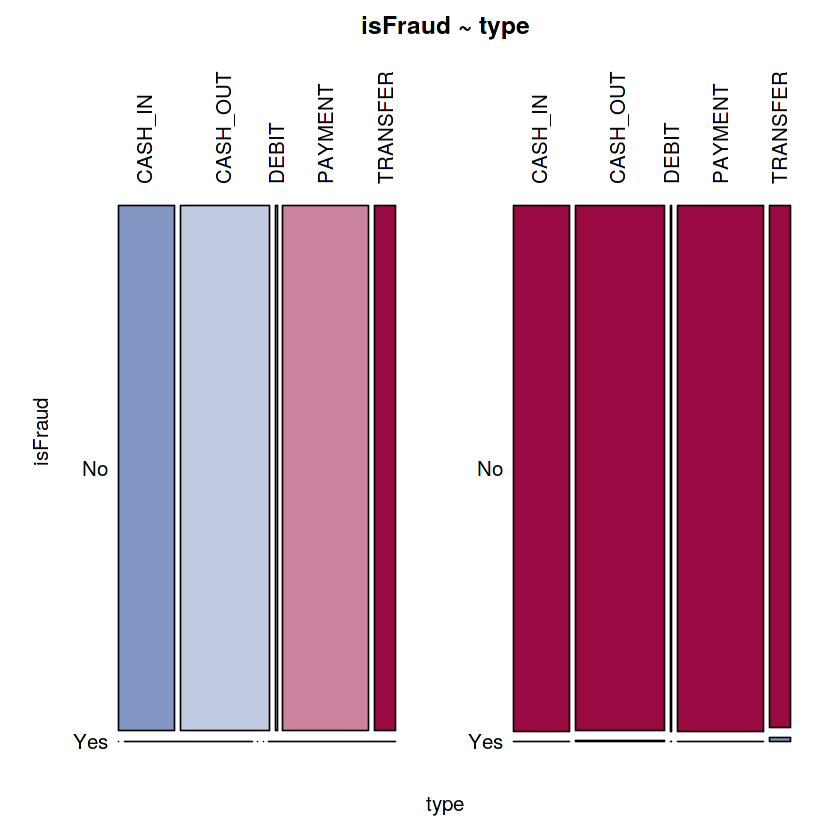

In [25]:
# Exploracion de fraudes segun tipo de operacion
library(DescTools)
options(scipen=100)
Desc(isFraud~type,fraud_df2)

[INFO] filtering variables ... 
[INFO] Variable filtering on 6362620 rows and 9 columns in 00:05:02 
0 variables are removed 


variable,info_value
<chr>,<dbl>
step,5.4844322
type,5.1630597
oldbalanceOrg,4.8573515
newbalanceOrig,3.4326652
name_dest_first,2.8274858
oldbalanceDest,2.6323187
newbalanceDest,2.4628587
amount,0.1346723


[INFO] creating woe binning ... 
[INFO] Binning on 6362620 rows and 9 columns in 00:02:13 


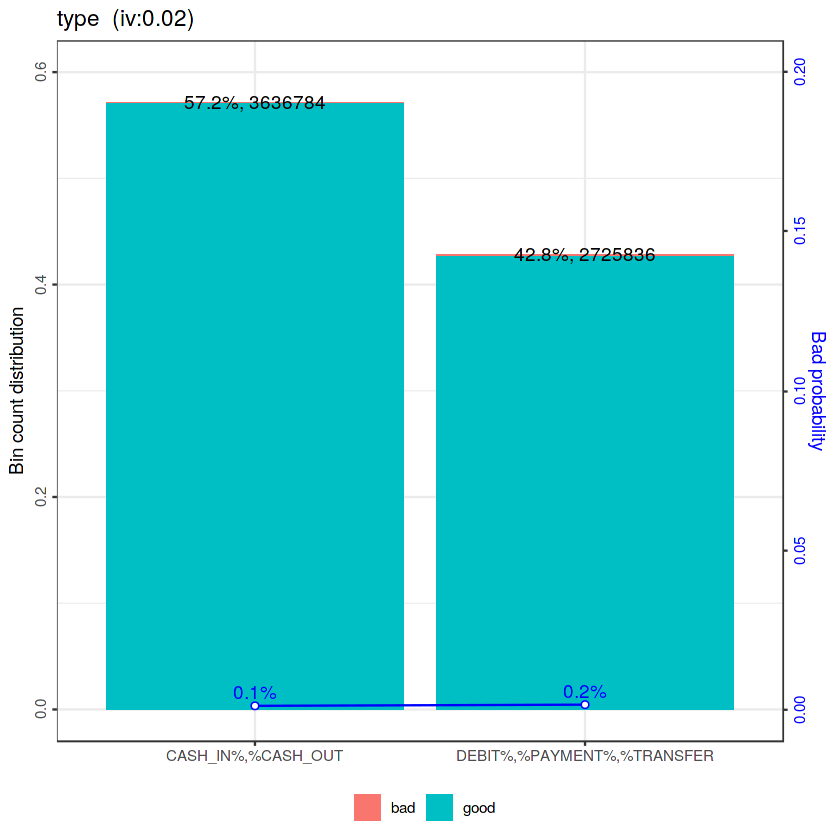

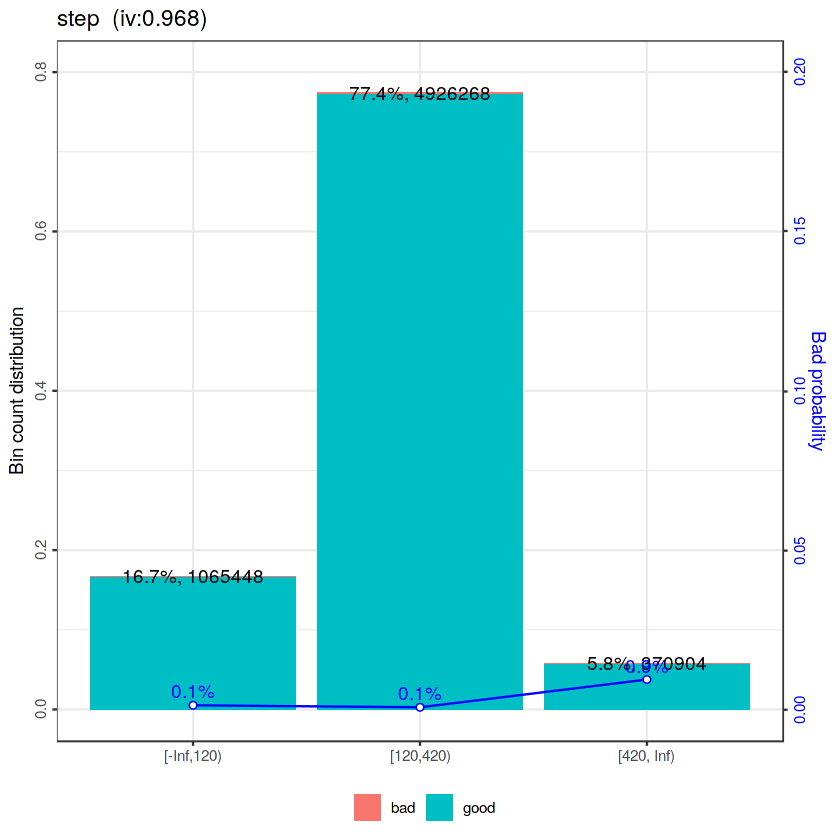

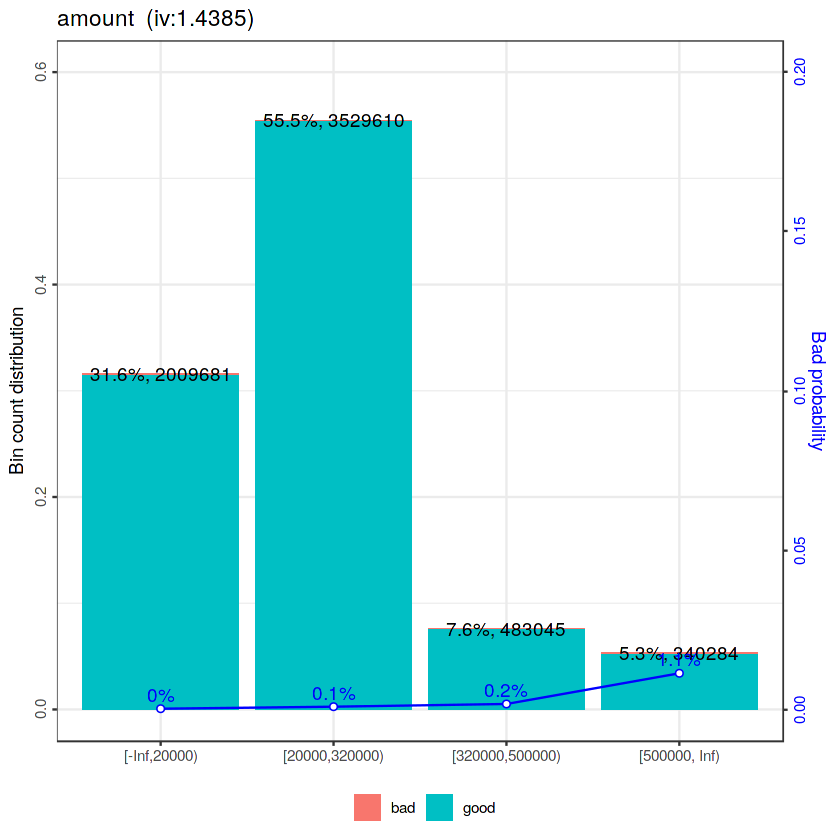

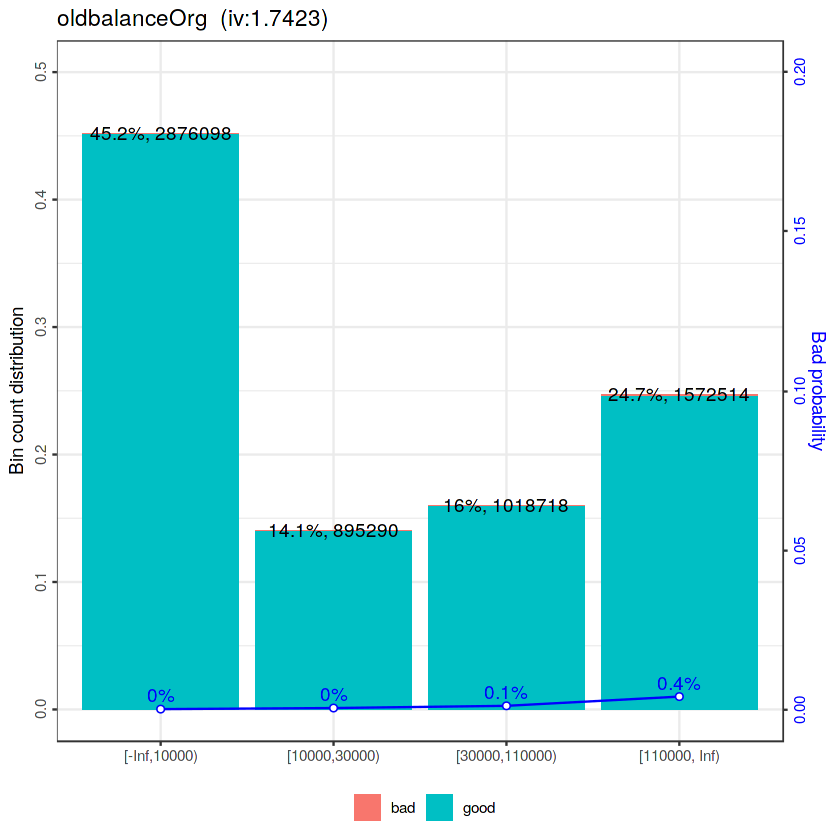

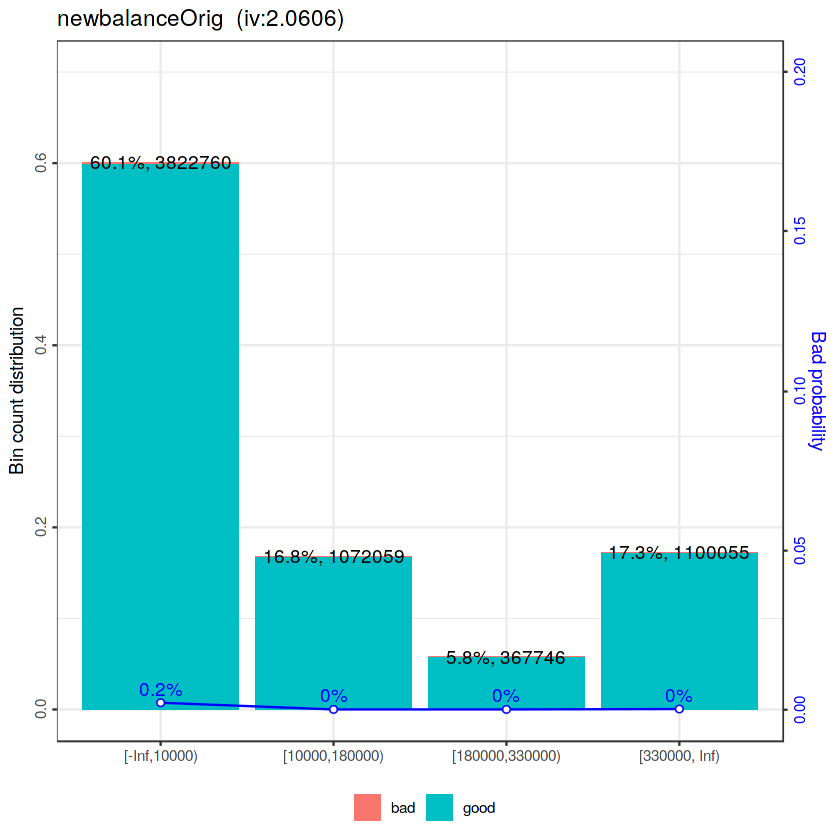

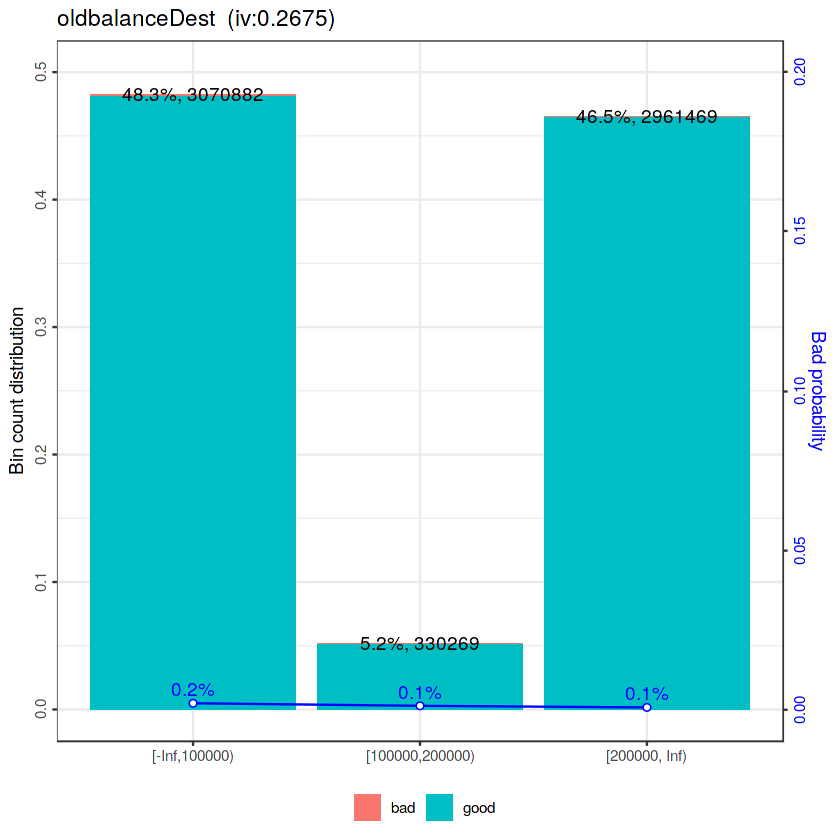

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


$type

$step

$amount

$oldbalanceOrg

$newbalanceOrig

$oldbalanceDest

$newbalanceDest

$name_dest_first


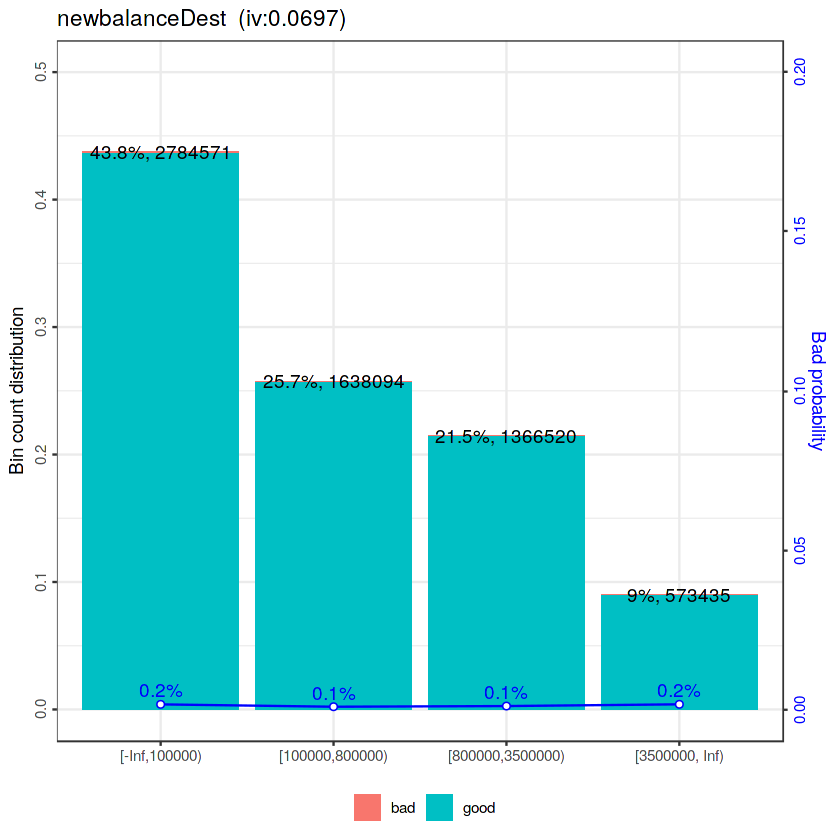

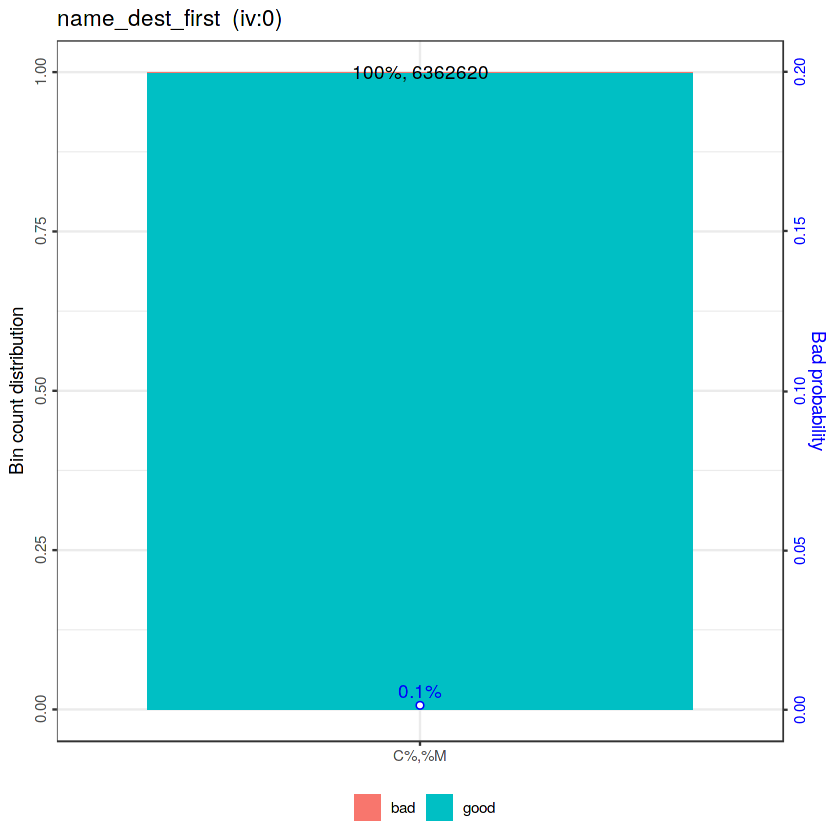

In [30]:
# Exploracion de fraudes segun tipo de operacion
library(scorecard)

# Indicar variable objetivo
dt_f = var_filter(fraud_df2, y="isFraud")
iv(dt_f, y="isFraud")
bins = woebin(dt_f, y="isFraud")
woebin_plot(bins)


In [31]:
# seleccion de muestra 
library(caret)
splitIndex <- createDataPartition(fraud_df2$isFraud, p = .20,
list = FALSE,
times = 1)
muestra<- fraud_df2[ splitIndex,]

dim(fraud_df2)
dim(muestra)

[1] 6362620       9

[1] 1272525       9

# 3. Reduciendo la muestra inicial

In [33]:
# Nueva tabla de datos quitando casos
fraud_df3 <- fraud_df2 %>%
    filter(type %in% c("CASH_OUT", "TRANSFER")) %>%
    filter(name_dest_first == "C") %>%
    filter(amount <= 10000000) %>%
    select(-name_dest_first)

In [35]:
glimpse(fraud_df3)

Observations: 2,767,966
Variables: 8
$ isFraud        <fct> Yes, Yes, No, No, No, No, No, No, No, No, No, No, No, …
$ type           <fct> TRANSFER, CASH_OUT, CASH_OUT, TRANSFER, TRANSFER, CASH…
$ step           <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ amount         <dbl> 181.00, 181.00, 229133.94, 215310.30, 311685.89, 11041…
$ oldbalanceOrg  <dbl> 181.00, 181.00, 15325.00, 705.00, 10835.00, 26845.41, …
$ newbalanceOrig <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, …
$ oldbalanceDest <dbl> 0.00, 21182.00, 5083.00, 22425.00, 6267.00, 288800.00,…
$ newbalanceDest <dbl> 0.00, 0.00, 51513.44, 0.00, 2719172.89, 2415.16, 64106…


In [36]:
summary(fraud_df3)

 isFraud             type              step         amount        
 No :2759753   CASH_IN :      0   Min.   :  1   Min.   :       0  
 Yes:   8213   CASH_OUT:2237500   1st Qu.:155   1st Qu.:   82900  
               DEBIT   :      0   Median :236   Median :  171092  
               PAYMENT :      0   Mean   :242   Mean   :  300426  
               TRANSFER: 530466   3rd Qu.:332   3rd Qu.:  306252  
                                  Max.   :743   Max.   :10000000  
 oldbalanceOrg      newbalanceOrig     oldbalanceDest      newbalanceDest     
 Min.   :       0   Min.   :       0   Min.   :        0   Min.   :        0  
 1st Qu.:       0   1st Qu.:       0   1st Qu.:   127785   1st Qu.:   326982  
 Median :     311   Median :       0   Median :   554620   Median :   826727  
 Mean   :   47669   Mean   :   16106   Mean   :  1670726   Mean   :  1998711  
 3rd Qu.:   31013   3rd Qu.:       0   3rd Qu.:  1730370   3rd Qu.:  2116020  
 Max.   :59585040   Max.   :49585040   Max.   :356015889 

# 4. Representacion grafica de fraudes y no fraudes

In [37]:
# Muestra aleatoria de no fraudes
not_fraud <- fraud_df3 %>%
    filter(isFraud == "No") %>%
    sample_n(8213)

# Universo de fraudes
is_fraud <- fraud_df3 %>%
    filter(isFraud == "Yes")
# Consolido ambas muestras
full_sample <- rbind(not_fraud, is_fraud) %>%
    arrange(step)

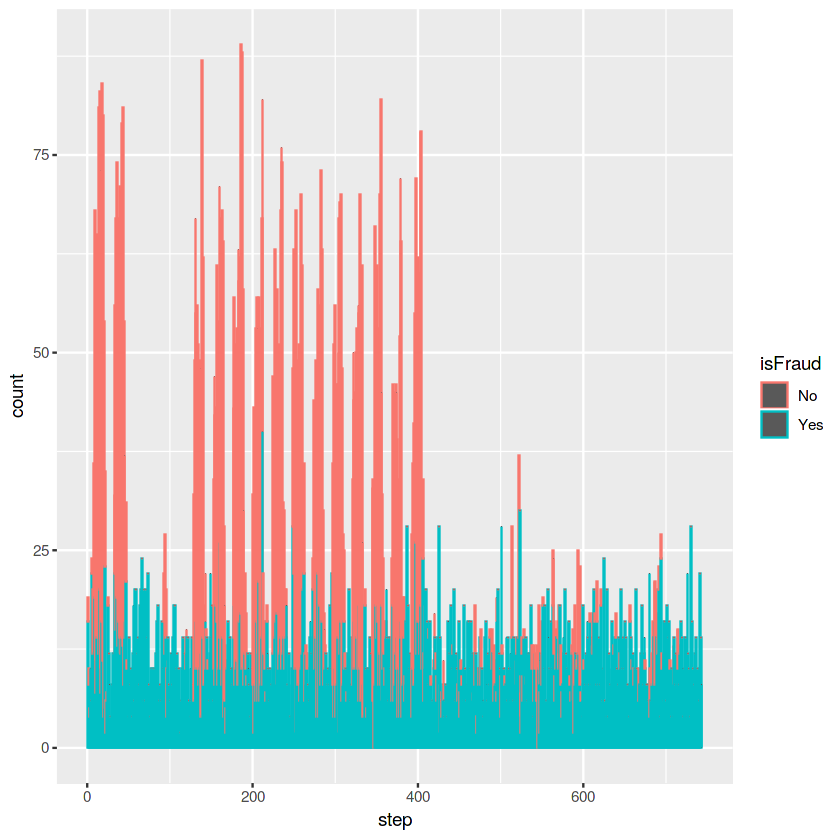

In [38]:
# REvision de la variables step por fraudes
ggplot(full_sample, aes(x = step, col = isFraud)) + 
    geom_histogram(bins = 743)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


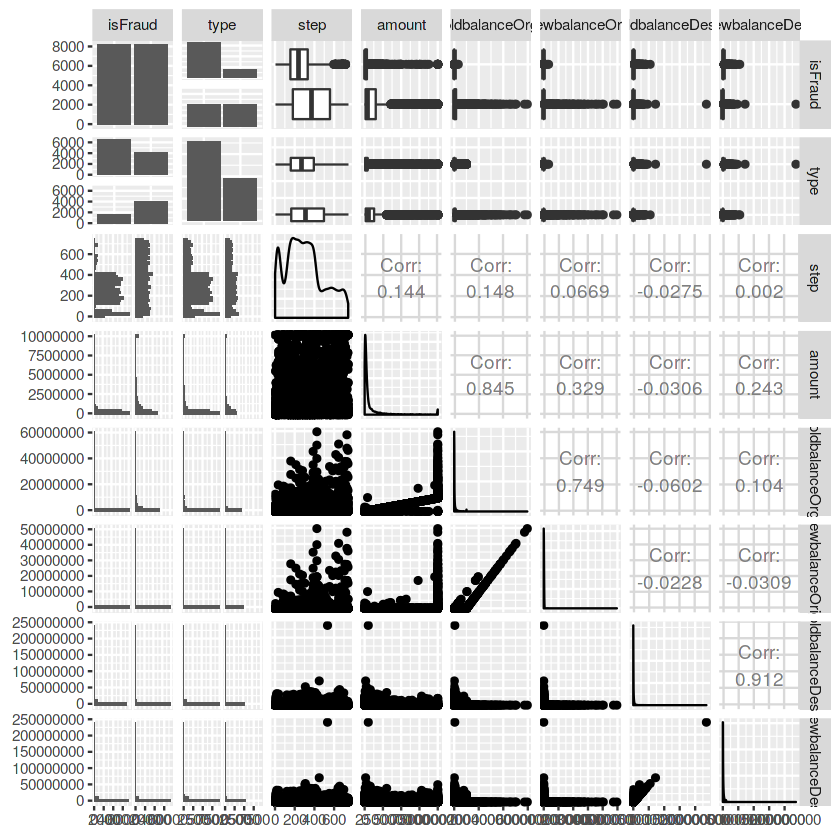

In [41]:
# Revision de relaciones entre las variables
ggpairs(full_sample)


# 4. Preprocesamiento para modelizar

In [42]:
# DEfinicion de criterios de prreprocesamiento
preproc_model <- preProcess(fraud_df3[, -1], 
                            method = c("center", "scale", "nzv"))
# Transformacion de los datos
fraud_preproc <- predict(preproc_model, newdata = fraud_df3[, -1])

In [47]:
#Agregando la variable target y las variables escaladas
fraud_pp_w_result <- cbind(isFraud = fraud_df3$isFraud, fraud_preproc)

In [48]:
summary(fraud_pp_w_result)

 isFraud             type              step             amount        
 No :2759753   CASH_IN :      0   Min.   :-1.7008   Min.   :-0.49551  
 Yes:   8213   CASH_OUT:2237500   1st Qu.:-0.6138   1st Qu.:-0.35878  
               DEBIT   :      0   Median :-0.0420   Median :-0.21332  
               PAYMENT :      0   Mean   : 0.0000   Mean   : 0.00000  
               TRANSFER: 530466   3rd Qu.: 0.6357   3rd Qu.: 0.00961  
                                  Max.   : 3.5369   Max.   :15.99817  
 oldbalanceOrg       oldbalanceDest     newbalanceDest    
 Min.   : -0.18960   Min.   :-0.42399   Min.   :-0.47994  
 1st Qu.: -0.18960   1st Qu.:-0.39156   1st Qu.:-0.40142  
 Median : -0.18836   Median :-0.28324   Median :-0.28142  
 Mean   :  0.00000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: -0.06625   3rd Qu.: 0.01514   3rd Qu.: 0.02817  
 Max.   :236.80038   Max.   :89.92368   Max.   :85.04701  

# 5. Correlaciones entre variables predictoras

In [50]:
# Seleccion de variable numericas
fraud_numeric <- fraud_pp_w_result %>%
    select(-isFraud, -type)

In [53]:
# Matriz de correlacio
cor(fraud_numeric)

,step,amount,oldbalanceOrg,oldbalanceDest,newbalanceDest
step,1.000000000,0.04193579,0.005789154,0.03678927,0.036673844
amount,0.041935793,1.00000000,0.179922274,0.15291713,0.328979078
oldbalanceOrg,0.005789154,0.17992227,1.000000000,-0.02081847,-0.009710841
oldbalanceDest,0.036789273,0.15291713,-0.020818473,1.00000000,0.974799062
newbalanceDest,0.036673844,0.32897908,-0.009710841,0.97479906,1.000000000


In [51]:
high_cor_cols <- findCorrelation(cor(fraud_numeric), cutoff = .75, verbose = TRUE, 
                                 names = TRUE, exact = TRUE)

Compare row 5  and column  4 with corr  0.975 
  Means:  0.338 vs 0.149 so flagging column 5 
All correlations <= 0.75 


In [54]:
high_cor_removed <- fraud_pp_w_result %>%
    select(-newbalanceDest)

In [55]:
fraud_numeric <- high_cor_removed %>%
    select(-isFraud, -type)
comboInfo <- findLinearCombos(fraud_numeric)
comboInfo

$linearCombos
list()

$remove
NULL

# 6. Modelamiento

In [56]:

model_df <-high_cor_removed

In [57]:
# Balanceo de muestra
is_fraud <- model_df %>%
    filter(isFraud == "Yes")

not_fraud <- model_df %>%
    filter(isFraud == "No") %>%
    sample_n(8213)

# Muestra total
model_full_sample <- rbind(is_fraud, not_fraud) %>%
    arrange(step)

In [59]:
# Muestra de aprendizaje y de test
in_train <- createDataPartition(y = model_full_sample$isFraud, p = .75, 
                               list = FALSE) 
train <- model_full_sample[in_train, ] 
test <- model_full_sample[-in_train, ] 

In [60]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,11659590,622.7,30457071,1626.6,30457071,1626.6
Vcells,262911236,2005.9,513122341,3914.9,513122341,3914.9


# 7. Configuracion de parametros

In [61]:
# Estalecen los pasos de aprendizaje del algoritmos
control <- trainControl(method = "repeatedcv", 
                        number = 10, 
                        repeats = 3, 
                        classProbs = TRUE, 
                        summaryFunction = twoClassSummary)

In [62]:
# Modelo de arbol de clasificacion
start_time <- Sys.time()
rpart_model = train(isFraud ~ .,
                    data = train,
                    method = "rpart",
                    tuneLength = 10,
                    metric = "ROC",
                    trControl = control, 
                    parms=list(split='information'))
end_time <- Sys.time()
end_time - start_time

Time difference of 20.52114 secs

In [83]:
rpart_model$results

cp,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.0008116883,0.9865061,0.9382035,0.9745130,0.003210150,0.01241413,0.009685527
0.0008928571,0.9864885,0.9375541,0.9733766,0.003178290,0.01175076,0.009623876
0.0022727273,0.9845447,0.9268398,0.9697511,0.002495008,0.01157309,0.007738415
0.0025974026,0.9833980,0.9229978,0.9698052,0.002747227,0.01278023,0.007680855
0.0051948052,0.9776378,0.9012987,0.9650974,0.003265916,0.02052719,0.023118750
0.0059253247,0.9757206,0.8951299,0.9634199,0.005357950,0.02393700,0.030093251
0.0072646104,0.9667932,0.8747294,0.9479437,0.006886564,0.02352915,0.047835135
0.0208333333,0.8906132,0.7600649,0.9940476,0.009719281,0.01453493,0.003199764
0.0362824675,0.8581834,0.7946429,0.9097944,0.027013142,0.03433858,0.064913626


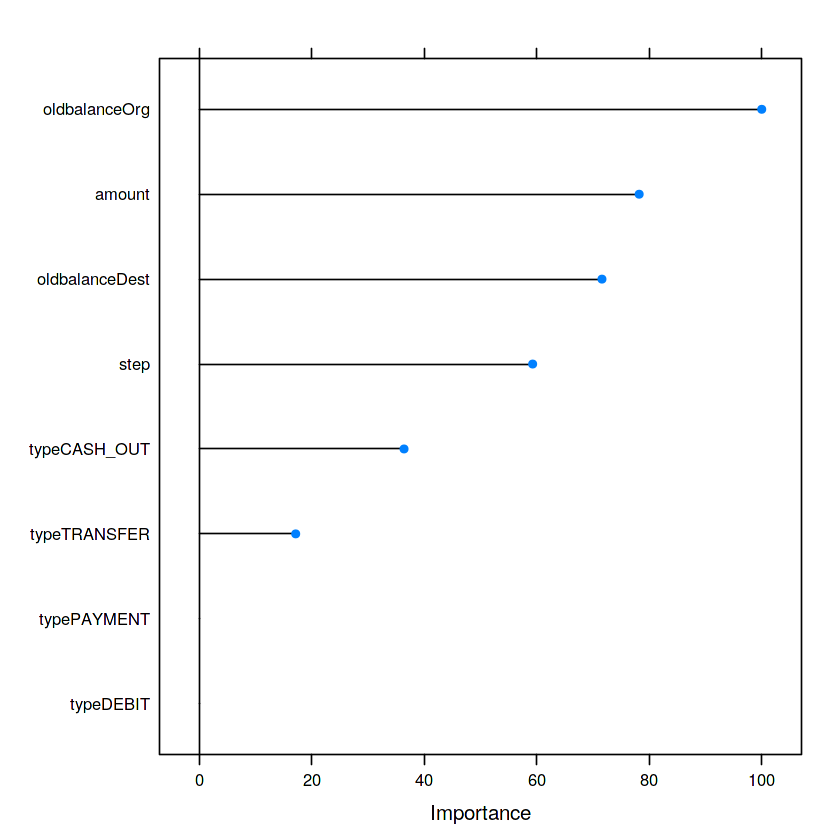

In [66]:
# Comproension del modelo de arbol de clasificacion
#summary(rpart_model)
ctreeVarImp = varImp(rpart_model)
plot(ctreeVarImp)

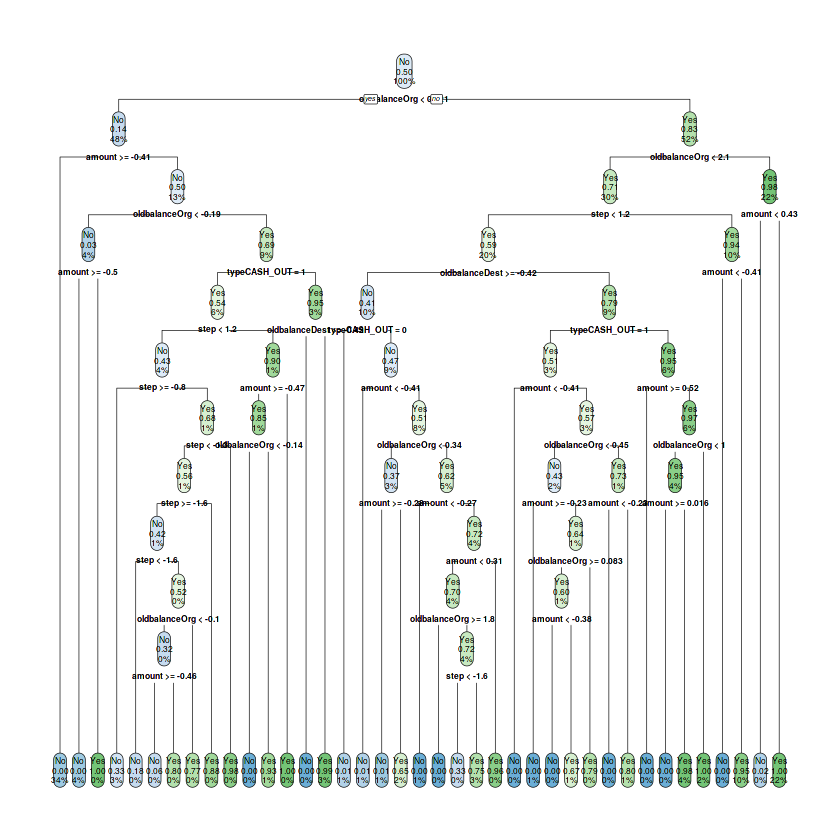

In [70]:
# Identificacion de Fraudes
library(rpart)
library(rpart.plot)
rpart.plot(rpart_model$finalModel)

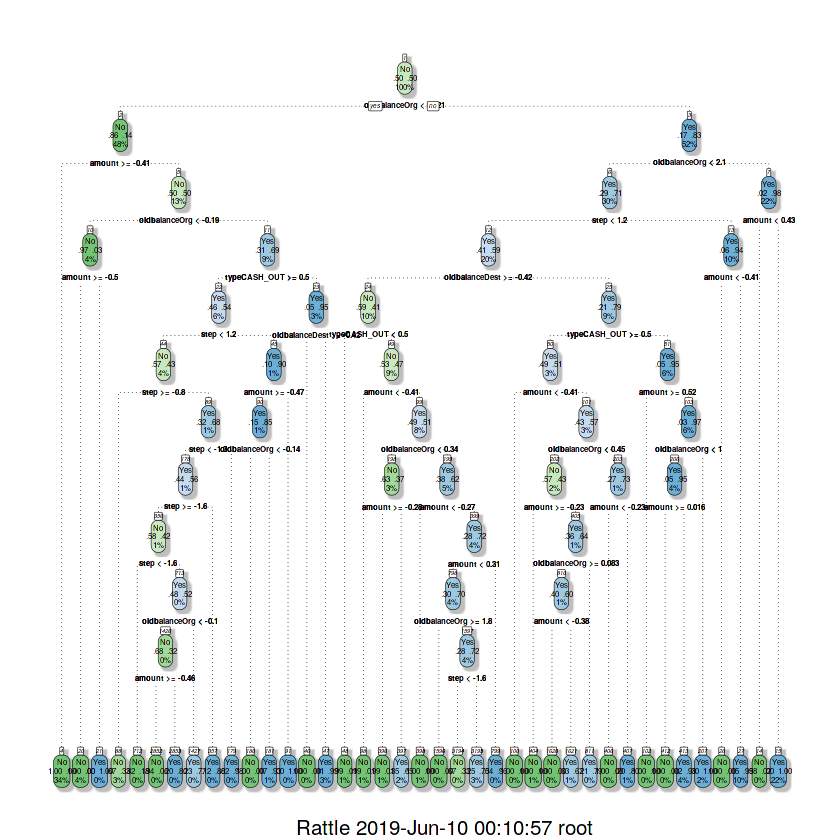

In [86]:
# Identificacion de Fraudes
library(rattle)
fancyRpartPlot(rpart_model$finalModel)

In [88]:
# Evaluacion del pronostico

# Data entrenamiento
rpart_train_pred <- predict(rpart_model, train)
confusionMatrix(train$isFraud, rpart_train_pred)

# Data Test
rpart_test_pred <- predict(rpart_model, test)
confusionMatrix(test$isFraud, rpart_test_pred)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  5800  360
       Yes  175 5985
                                               
               Accuracy : 0.9566               
                 95% CI : (0.9528, 0.9601)     
    No Information Rate : 0.515                
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 0.9131               
                                               
 Mcnemar's Test P-Value : 0.000000000000001791 
                                               
            Sensitivity : 0.9707               
            Specificity : 0.9433               
         Pos Pred Value : 0.9416               
         Neg Pred Value : 0.9716               
             Prevalence : 0.4850               
         Detection Rate : 0.4708               
   Detection Prevalence : 0.5000               
      Balanced Accuracy : 0.9570               
                    

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1901  152
       Yes   51 2002
                                               
               Accuracy : 0.9506               
                 95% CI : (0.9435, 0.957)      
    No Information Rate : 0.5246               
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 0.9011               
                                               
 Mcnemar's Test P-Value : 0.000000000002241    
                                               
            Sensitivity : 0.9739               
            Specificity : 0.9294               
         Pos Pred Value : 0.9260               
         Neg Pred Value : 0.9752               
             Prevalence : 0.4754               
         Detection Rate : 0.4630               
   Detection Prevalence : 0.5000               
      Balanced Accuracy : 0.9517               
                    

In [94]:
library(C50)
grid <- expand.grid( .winnow = c(FALSE), 
                     .trials=c(50, 100, 150, 200), 
                     .model="tree" )

start_time <- Sys.time()
c5_model <- train(isFraud ~ .,
                  data = train, 
                  method = "C5.0",
                  trControl = control, 
                  metric = "ROC",
                  tuneGrid = grid, 
                  verbose = FALSE)
end_time <- Sys.time()
end_time - start_time

Warning message:
“model fit failed for Fold01.Rep1: model=tree, winnow=FALSE, trials=200 Error : number of boosting iterations must be between 1 and 100
”Warning message:
“model fit failed for Fold02.Rep1: model=tree, winnow=FALSE, trials=200 Error : number of boosting iterations must be between 1 and 100
”Warning message:
“model fit failed for Fold03.Rep1: model=tree, winnow=FALSE, trials=200 Error : number of boosting iterations must be between 1 and 100
”Warning message:
“model fit failed for Fold04.Rep1: model=tree, winnow=FALSE, trials=200 Error : number of boosting iterations must be between 1 and 100
”Warning message:
“model fit failed for Fold05.Rep1: model=tree, winnow=FALSE, trials=200 Error : number of boosting iterations must be between 1 and 100
”Warning message:
“model fit failed for Fold06.Rep1: model=tree, winnow=FALSE, trials=200 Error : number of boosting iterations must be between 1 and 100
”Warning message:
“model fit failed for Fold07.Rep1: model=tree, winnow=FALSE

Time difference of 17.59535 secs

In [111]:
c5_model$bestTune

trials,model,winnow
<dbl>,<fct>,<lgl>
50,tree,FALSE


In [95]:
print(c5_model)

C5.0 

12320 samples
    5 predictor
    2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 11088, 11088, 11088, 11088, 11088, 11088, ... 
Resampling results across tuning parameters:

  trials  ROC  Sens  Spec
   50     0.5  NaN   NaN 
  100     0.5  NaN   NaN 
  150     0.5  NaN   NaN 
  200     0.5  NaN   NaN 

Tuning parameter 'model' was held constant at a value of tree
Tuning
 parameter 'winnow' was held constant at a value of FALSE
ROC was used to select the optimal model using the largest value.
The final values used for the model were trials = 50, model = tree and winnow
 = FALSE.


In [96]:
c5_pred_train <- predict(c5_model, train)
confusionMatrix(train$isFraud, c5_pred_train, positive = "Yes")

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  6134   26
       Yes   17 6143
                                             
               Accuracy : 0.9965             
                 95% CI : (0.9953, 0.9975)   
    No Information Rate : 0.5007             
    P-Value [Acc > NIR] : <0.0000000000000002
                                             
                  Kappa : 0.993              
                                             
 Mcnemar's Test P-Value : 0.2225             
                                             
            Sensitivity : 0.9958             
            Specificity : 0.9972             
         Pos Pred Value : 0.9972             
         Neg Pred Value : 0.9958             
             Prevalence : 0.5007             
         Detection Rate : 0.4986             
   Detection Prevalence : 0.5000             
      Balanced Accuracy : 0.9965             
                                             
       'Po

In [97]:
c5_pred_test <- predict(c5_model, test)
confusionMatrix(test$isFraud, c5_pred_test, positive = "Yes")

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1995   58
       Yes   19 2034
                                               
               Accuracy : 0.9812               
                 95% CI : (0.9766, 0.9852)     
    No Information Rate : 0.5095               
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 0.9625               
                                               
 Mcnemar's Test P-Value : 0.00001488           
                                               
            Sensitivity : 0.9723               
            Specificity : 0.9906               
         Pos Pred Value : 0.9907               
         Neg Pred Value : 0.9717               
             Prevalence : 0.5095               
         Detection Rate : 0.4954               
   Detection Prevalence : 0.5000               
      Balanced Accuracy : 0.9814               
                    

In [101]:
big_no_sample <- model_df %>%
    filter(isFraud == "No") %>%
    sample_n(100000)

In [102]:
# Falsas alarmas de Fraudes

start_time <- Sys.time()
c5_pred_big_no <- predict(c5_model, big_no_sample)
end_time <- Sys.time()
end_time - start_time


Time difference of 4.22699 secs

In [103]:


confusionMatrix(big_no_sample$isFraud, c5_pred_big_no, positive = "Yes")

Confusion Matrix and Statistics

          Reference
Prediction    No   Yes
       No  97574  2426
       Yes     0     0
                                             
               Accuracy : 0.9757             
                 95% CI : (0.9748, 0.9767)   
    No Information Rate : 0.9757             
    P-Value [Acc > NIR] : 0.5054             
                                             
                  Kappa : 0                  
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.00000            
            Specificity : 1.00000            
         Pos Pred Value :     NaN            
         Neg Pred Value : 0.97574            
             Prevalence : 0.02426            
         Detection Rate : 0.00000            
   Detection Prevalence : 0.00000            
      Balanced Accuracy : 0.50000            
                                             
    